In [1]:
%matplotlib inline

# Head First Statistics

## by Dawn Griffiths

### Copyright © 2009 O’Reilly Media, Inc. All rights reserved.

### ISBN: 978-0-596-52758-7

Cover:
<div>
    <img src="./images/hf_stat_front_cover.jpg" alt="Book Front Cover" style="width: 50%;"/>
</div>

In [2]:
# test
import os
import sys

try:
    user_paths = os.environ['PYTHONPATH'].split(os.pathsep)
except KeyError:
    user_paths = []

print("PYTHONPATH: ", user_paths)
print("sys.path: ")
for path in sys.path:
    print(path)


PYTHONPATH:  []
sys.path: 
/home/willem/git/practical-statistics-for-data-scientists/python/headfirst_statistics_notebooks
/home/willem/anaconda3/envs/ds311/lib/python311.zip
/home/willem/anaconda3/envs/ds311/lib/python3.11
/home/willem/anaconda3/envs/ds311/lib/python3.11/lib-dynload

/home/willem/anaconda3/envs/ds311/lib/python3.11/site-packages


In [3]:
import requests
import matplotlib
import yfinance
msft = yfinance.Ticker("MSFT")
for key, value in msft.info.items(): # you need items() to unpack key, value from a dictionary (since python 3)
    print(f"{key}: {value}")

ModuleNotFoundError: No module named 'requests'

# Chapter 1 visualizing information
## First Impressions
### Part 1: pie charts and bar charts

### Statistics definition
Statistics are numbers that summarize raw facts and figures in some
meaningful way. 

They present key ideas that may not be immediately
apparent by just looking at the raw data, and by data, we mean facts or figures
from which we can draw conclusions. 

#### example
Calculate the league position of all participating teams from all the match results of the current season.

This is a nice summary that save supporters lots of time.

## Pie charts
Pie charts work by splitting your data into distinct groups or categories.
The chart consists of a circle split into wedge-shaped slices, and each slice
represents a group. The size of each slice is proportional to how many are
in each group compared with the others. The larger the slice, the greater
the relative popularity of that group. The number in a particular group is
called the **frequency**.

Pie charts devide your total dataset into distinct groups or categories that are represented as slices.
The sum of frequencies of each slice should represent 100%; the complete dataset.

### Frequency
Frequency describes how many items there are in a particular group or interval. 

It’s like a count of how many there are.


### Example: Units of games sold by genre

| Genre    | Units sold |
| -------- | ---------- |
| Sports   | 27,500     |
| Strategy | 11,500     |
| Action   | 6,000      |
| Shooter  | 3,500      |
| Other    | 1,500      |


The labels variable is of type <class 'tuple'>
The units_solds variable is of type <class 'list'>
The explode variable is of type <class 'tuple'>
The sales_plot_fig variable is of type <class 'matplotlib.figure.Figure'>
The sales_plot_axes variable is of type <class 'matplotlib.axes._axes.Axes'>


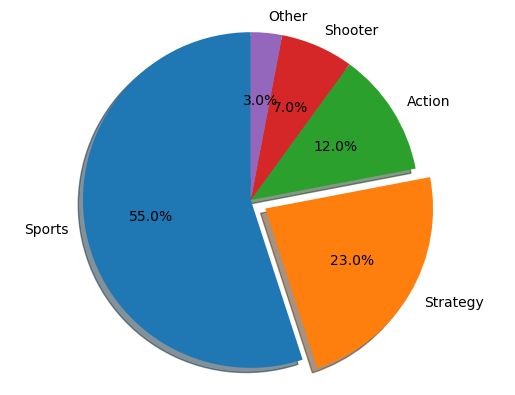

In [4]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Sports', 'Strategy', 'Action', 'Shooter', 'Other'
print(f'The labels variable is of type {type(labels)}')
units_solds = [27_500, 11_500, 6_000, 3_500, 1_500]
print(f'The units_solds variable is of type {type(units_solds)}')
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Strategy')
print(f'The explode variable is of type {type(explode)}')

sales_plot_fig, sales_plot_axes = plt.subplots() # example of tuple unpacking
print(f'The sales_plot_fig variable is of type {type(sales_plot_fig)}')
print(f'The sales_plot_axes variable is of type {type(sales_plot_axes)}')

# Because we use a keyword arguments instead of a positional arguments for optional ones their position
# won't matter.
# the autopct='%1.1f%%' argument translates the numbers into percentages formatted with 1 decimal accuracy
sales_plot_axes.pie(units_solds, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
sales_plot_axes.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### When not to use pie charts
Pie charts are less useful if all the slices have
similar sizes, as it’s difficult to pick up on subtle differences between
the slice sizes.

### Example: visualizing satisfactory rate per genre
| Genre    | satisfied customers in % |
| -------- | -------------------------|
| Sports   | 99                       |
| Strategy | 90                       |
| Action   | 85                       |
| Shooter  | 95                       |
| Other    | 85                       |

#### Trying to visualize this in a pie chart

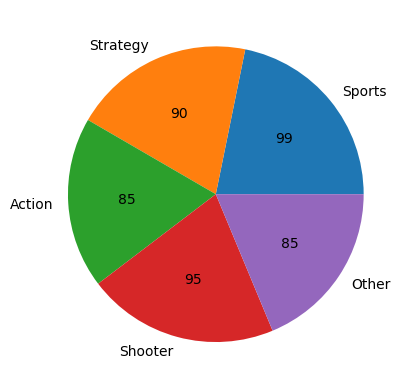

In [5]:
# We want to show the original figures not the automatically calculated percentages
# Therefore, we can use this function with the autopct keyword argument
# See https://stackoverflow.com/questions/53782591/how-to-display-actual-values-instead-of-percentages-on-my-pie-chart-using-matplo
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

# we already have the labels tuple variable
# The order of percentages should correspond with the labels tuple
# which is the same as the order in the table in the previous cell
satisfaction_rate = [99, 90, 85, 95, 85]

satisfaction_fig, satisfaction_axes = plt.subplots() # example of tuple unpacking
satisfaction_axes.pie(satisfaction_rate, labels=labels, autopct = autopct_format(satisfaction_rate))

plt.show()

There are two issues with this pie chart:

- The values lie close together, so we can't easily see any significant distinction among the frequencies
- It’s also generally confusing to label pie charts with percentages that don’t relate to the overall proportion of the slice.
  - Here, we violate the premise that we use a pie chart, to display portions / categories that add up to a total population of 100%. The percentages here do not express the total population.

## Bar charts
Vertical bar charts show categories on the horizontal axis, and either frequency or percentage on the vertical axis.

The height of each bar indicates the value of its category. 

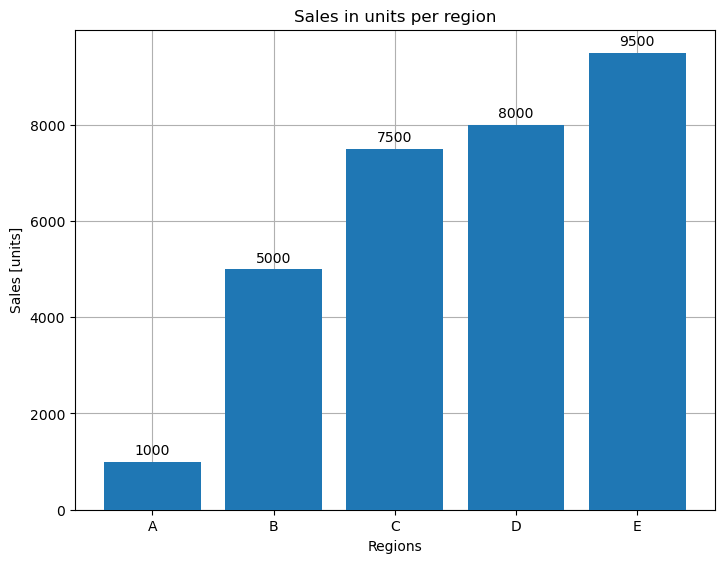

In [6]:

# set up the diagram
sales_fig = plt.figure()
sales_ax = sales_fig.add_axes([0,0,1,1])

# Add captions to the diagram and its axes
sales_ax.set_title('Sales in units per region')
sales_ax.set_ylabel('Sales [units]')
sales_ax.set_xlabel('Regions')

# Provide the values
regions = ['A', 'B', 'C', 'D', 'E']
sales = [1_000,5_000,7_500,8_000,9_500]

# Add grid,
# the zorder keyword argument will help for the grid to be behind the bars
sales_ax.grid(zorder=0)

# create a vertical bar chart with the values
# zorder keyword argument is added for the bars to appear before the grid
# (works together with the zorder=0 argument of the previous grid function call)
sales_bar = sales_ax.bar(regions, sales, zorder=3)

# Adding the sales values on top of the bars
sales_ax.bar_label(sales_bar, padding=3)

# display the chart
plt.show()

### Variations: the horizontal bar chart
With horizontal bar charts, you show the categories on
the vertical axis and the frequency or percentage on the horizontal axis.

### Again our previous example: visualizing satisfactory rate per genre
| Genre    | satisfied customers in % |
| -------- | -------------------------|
| Sports   | 99                       |
| Strategy | 90                       |
| Action   | 85                       |
| Shooter  | 95                       |
| Other    | 85                       |

#### Now trying to visualize this in horizontal bar chart instead of a pie chart
Horizontal bar charts are useful if the names of your categories are long. 

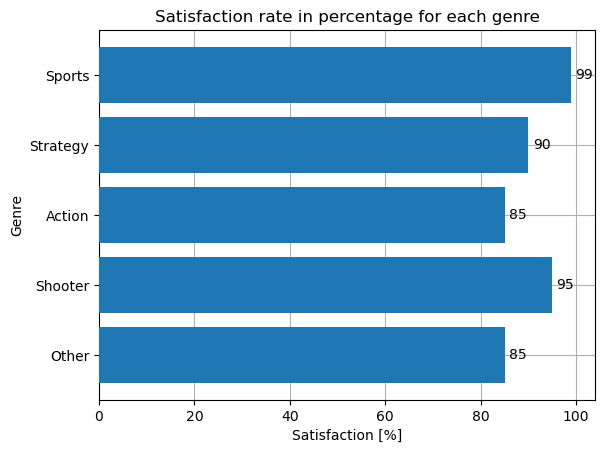

In [7]:
# set up the diagram
satis_bar_fig, satis_bar_axes = plt.subplots() # example of tuple unpacking

# Add captions to the diagram and its axes
satis_bar_axes.set_title('Satisfaction rate in percentage for each genre')
satis_bar_axes.set_ylabel('Genre')
satis_bar_axes.set_xlabel('Satisfaction [%]')

# The values labels and satisfaction_rate were set up in a previous cell
# rerun the whole notebook if they aren't available


# Add grid,
# the zorder keyword argument will help for the grid to be behind the bars
satis_bar_axes.grid(zorder=0)

# create a vertical bar chart with the values
# zorder keyword argument is added for the bars to appear before the grid
# (works together with the zorder=0 argument of the previous grid function call)
satis_bar = satis_bar_axes.barh(labels, satisfaction_rate, zorder=3)

# reverse the order on the y axis to get a top down display of the order of the labels tuple
satis_bar_axes.invert_yaxis()

# Adding the satisfaction rating to the side of the bars
satis_bar_axes.bar_label(satis_bar, padding=3)

# display the chart
plt.show()

#### When to use percentages and when frequencies
The problem with our bar chart above is that it doesn’t tell us how many players there are for each genre. 

Therefore, we do not know representative these percentages are of players as a whole. When a lot more players play sports games than Strategy games than comparing these percentages per genre is not very significant.

##### Warning!
**Be very wary if you’re given percentages with no frequencies, or a frequency with no percentage.**

*Sometimes this is a tactic used to hide key facts about the underlying data, as just based on a chart, you have no way of telling how representative it is of the data.*

*You may find that a large percentage of people prefer one particular game genre, but that only 10 people were questioned. Alternatively, you might find that 10,000 players like sports games most, but by itself, you can’t tell whether this is a high or low proportion of all game players.*

#### Bar chart variations to combine more information like frequencies and percentages
##### The split-category bar chart
One way of tackling this is to use one bar for the frequency of satisfied players and another for those dissatisfied, for each genre. This sort of chart is useful if you want to compare frequencies, but it’s difficult to see proportions and percentages.
##### The segmented bar chart
If you want to show frequencies and percentages, you can try using a segmented bar chart. For this, you use one bar for each category, but you split the bar proportionally. The overall length of the bar reflects the total frequency.

### Again our previous example: visualizing satisfactory rate per genre
#### Now trying to visualize this in horizontal segmented bar chart
| Genre    | Total sales | satisfaction in % | satisfied customers | dissatisfied customers |
| -------- | ----------: | ----------------: | ------------------: | ---------------------: |
| Sports   |      27,000 |                99 |              26,730 |                    270 |
| Strategy |      11,500 |                90 |              10,350 |                  1,150 |
| Action   |       6,000 |                85 |               5,100 |                    900 |
| Shooter  |       3,500 |                95 |               3,325 |                    175 |
| Other    |       1,500 |                85 |               1,275 |                    225 |



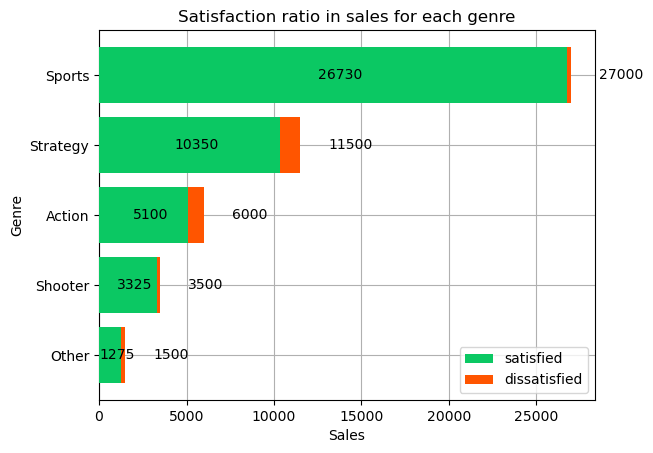

In [8]:
# set up the diagram
satis_bar_fig, satis_bar_axes = plt.subplots() # example of tuple unpacking

# Add captions to the diagram and its axes
satis_bar_axes.set_title('Satisfaction ratio in sales for each genre')
satis_bar_axes.set_ylabel('Genre')
satis_bar_axes.set_xlabel('Sales')

# The values labels were set up in a previous cell
# rerun the whole notebook if they aren't available
satisfied = (26_730, 10_350, 5_100, 3_325, 1_275)
dissatisfied = (270, 1_150, 900, 175, 225)


# Add grid,
# the zorder keyword argument will help for the grid to be behind the bars
satis_bar_axes.grid(zorder=0)

# create a horizontal bar chart with the values
# zorder keyword argument is added for the bars to appear before the grid
# (works together with the zorder=0 argument of the previous grid function call)
satisbar = satis_bar_axes.barh(labels, satisfied, color='#0bc863', zorder=3)
diss_bar = satis_bar_axes.barh(labels, dissatisfied, left=satisfied, color="#ff5500", zorder=3)

# reverse the order on the y axis to get a top down display of the order of the labels tuple
satis_bar_axes.invert_yaxis()

# add a legend for the color segments in each bar
satis_bar_axes.legend(labels=('satisfied', 'dissatisfied'))

# adding the values to the bar segments we should use label_type='center' to avoid overlap
satis_bar_axes.bar_label(satisbar, label_type='center', padding=5)

# edge will show the total values; center will show dissatisfied values
satis_bar_axes.bar_label(diss_bar, label_type='edge', padding=20) # large padding for ample separation

# display the chart
plt.show()

### Finally comparing the sales per genre for two consequetive years using a split-category bar chart
The split-category here being years

| Genre    | units sold in 2006 | Units sold in 2007 |
| -------- | -----------------: | -----------------: |
| Sports   |             15,900 |             27,500 |
| Strategy |             16,850 |             11,500 |
| Action   |              7,100 |              6,000 |
| Shooter  |              4,900 |              3,500 |
| Other    |              1,000 |              1,500 |


The type of the calculated y positions is <class 'numpy.ndarray'>
The calculated y positions are [0 1 2 3 4]


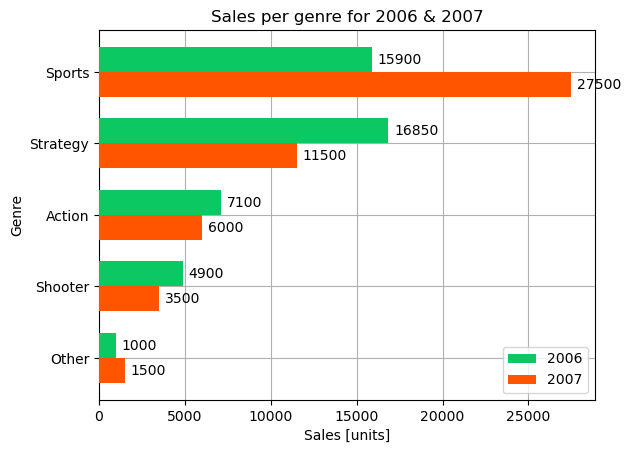

In [9]:
import numpy as np

# set up the diagram
sales_years_fig, sales_years_axes = plt.subplots() # example of tuple unpacking

# Add captions to the diagram and its axes
sales_years_axes.set_title('Sales per genre for 2006 & 2007')
sales_years_axes.set_ylabel('Genre')
sales_years_axes.set_xlabel('Sales [units]')

# The values labels were set up in a previous cell
# rerun the whole notebook if they aren't available
sales_2006 = (15_900, 16_850, 7_100, 4_900, 1_000)
sales_2007 = (27_500, 11_500, 6_000, 3_500, 1_500)

# Now we need to position two bars on the y axis per genre for this we use
y = np.arange(len(labels))  # the label locations
print(f'The type of the calculated y positions is {type(y)}')
print(f'The calculated y positions are {y}')
width = 0.35  # the width of the bars

# Add grid,
# the zorder keyword argument will help for the grid to be behind the bars
sales_years_axes.grid(zorder=0)

# create a horizontal bar chart with the values
# With split-category we use the calculated y position and the width (also as 3rd positional arg)
# instead of using the string values of the labels tuple directly
# zorder keyword argument is added for the bars to appear before the grid
# (works together with the zorder=0 argument of the previous grid function call)
barh_2006 = sales_years_axes.barh(y - width/2, sales_2006, width, color='#0bc863', zorder=3, label='2006')
barh_2007 = sales_years_axes.barh(y + width/2, sales_2007, width, color="#ff5500", zorder=3, label='2007')

# reverse the order on the y axis to get a top down display of the order of the labels tuple
sales_years_axes.invert_yaxis()

# make sure the string values from the labels tuple are still used as y axis labels
# now the bars are defined with specified y axis positions in the numpy.ndarray
sales_years_axes.set_yticks(y)
sales_years_axes.set_yticklabels(labels)

# add a legend for the color segments in each bar
sales_years_axes.legend(labels=('2006', '2007'))

# adding the sales values to the bars
sales_years_axes.bar_label(barh_2006, padding=4)
sales_years_axes.bar_label(barh_2007, padding=4)

# sales_years_fig.tight_layout()

# display the chart
plt.show()